<a href="https://colab.research.google.com/github/inesdarosa/visualizaciones_analisis/blob/main/ancap_C7_ValoresMedios_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
C7_independientes = pd.read_csv('/content/drive/MyDrive/ejercicios_proyectos/ancap/DATACHALLENGE 2022/juntas.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
C7_independientes.head()

,TimeStamp,Contenido_C7_Total,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,...,TDC_PHD.TI_21004,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001
0,2017-11-13,1.58,0.819295,0.826364,0.847221,100.932207,73.509561,42.189785,148.222538,134.299978,...,24.648609,442.648102,22.547738,20.247823,191.003268,27.907375,10.898639,24.418417,141.682951,44.708805
1,2017-11-14,0.87,0.801170,0.812762,0.825702,87.206888,73.730517,37.371204,152.319098,134.663371,...,27.740584,320.697308,26.483077,14.759753,220.627997,37.578431,9.934708,26.853525,143.529109,29.901066
2,2017-11-16,1.29,0.826219,0.838026,0.854918,104.310466,76.664024,33.994632,151.200238,134.382160,...,21.604751,496.624717,20.142313,20.496945,229.405410,32.068828,9.630138,19.135278,145.806926,37.894277
3,2017-11-17,1.90,0.833356,0.840347,0.860223,103.906107,79.025281,35.451903,149.734197,134.969764,...,22.862701,505.894340,21.714225,20.499442,354.016321,46.324541,9.678714,21.064360,144.965568,38.886583
4,2017-11-19,0.68,0.794647,0.835320,0.824547,98.335235,76.613032,32.870264,149.690790,134.991420,...,22.989765,433.497463,19.716302,20.499151,353.926343,41.802080,10.869379,19.465694,144.663966,35.695591


In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split

import math
from keras import models, layers, optimizers, regularizers
import random
from keras.layers import Dense, Activation, Dropout
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [5]:
indep = C7_independientes.iloc[:, 2:]
indep

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.TI_21004,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001
0,0.819295,0.826364,0.847221,100.932207,73.509561,42.189785,148.222538,134.299978,134.298269,143.105454,...,24.648609,442.648102,22.547738,20.247823,191.003268,27.907375,10.898639,24.418417,141.682951,44.708805
1,0.801170,0.812762,0.825702,87.206888,73.730517,37.371204,152.319098,134.663371,134.663521,145.053458,...,27.740584,320.697308,26.483077,14.759753,220.627997,37.578431,9.934708,26.853525,143.529109,29.901066
2,0.826219,0.838026,0.854918,104.310466,76.664024,33.994632,151.200238,134.382160,134.381825,147.355394,...,21.604751,496.624717,20.142313,20.496945,229.405410,32.068828,9.630138,19.135278,145.806926,37.894277
3,0.833356,0.840347,0.860223,103.906107,79.025281,35.451903,149.734197,134.969764,134.970762,146.560959,...,22.862701,505.894340,21.714225,20.499442,354.016321,46.324541,9.678714,21.064360,144.965568,38.886583
4,0.794647,0.835320,0.824547,98.335235,76.613032,32.870264,149.690790,134.991420,134.989959,146.505432,...,22.989765,433.497463,19.716302,20.499151,353.926343,41.802080,10.869379,19.465694,144.663966,35.695591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.769360,0.829987,0.911664,93.771048,72.940713,43.982653,143.374958,129.786254,129.786176,140.565724,...,21.490969,355.759307,21.840941,20.499949,286.991395,44.379109,10.387162,19.261349,139.110769,46.214135
1021,0.805865,0.829481,0.958815,93.245040,75.510633,48.102479,139.328632,130.078109,130.078108,137.372993,...,24.553036,361.827159,20.498705,20.499888,394.778991,48.646701,10.949769,16.318148,135.984513,49.236916
1022,0.819569,0.830223,1.005192,92.800712,75.054210,49.606981,139.682772,130.282600,130.282514,137.479890,...,22.568488,336.351993,19.291982,20.499901,297.588475,41.888330,11.149009,16.790318,136.050475,50.643185
1023,0.805388,0.830022,0.985939,92.210070,74.843244,48.075655,139.971817,130.544612,130.544389,137.861288,...,23.228329,368.523555,19.790073,20.499523,322.531761,43.179337,11.102227,16.925681,136.370074,49.200105


In [6]:
C7 = C7_independientes.iloc[:, 1:2]
C7

,Contenido_C7_Total
0,1.58
1,0.87
2,1.29
3,1.90
4,0.68
...,...
1020,0.77
1021,2.79
1022,2.00
1023,1.66


In [7]:
X_train, X_test, y_train, y_test = train_test_split(indep, C7, test_size=0.2, random_state=42)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.TI_21004,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001
835,0.780400,0.832297,0.919384,91.509023,74.589268,36.424904,137.088529,128.599081,128.599109,135.276544,...,24.759588,221.757607,17.654974,20.500226,218.726029,35.310598,11.507311,16.399039,133.683994,38.727812
137,0.821858,0.833394,0.859171,101.651110,77.396525,39.302831,145.912019,133.490280,133.490505,143.580159,...,31.501787,411.667969,24.014326,20.499708,295.424106,45.188974,9.925935,22.730954,142.489946,42.497968
534,0.809624,0.833355,0.887882,98.906801,74.992249,34.208182,144.287393,132.192748,132.192631,141.689880,...,26.927891,333.814187,22.130824,20.499999,306.132222,42.409712,10.292570,21.879270,140.462906,38.307758
495,0.812844,0.832287,0.857859,99.877061,78.057588,38.225745,143.927176,132.073822,132.074274,141.292556,...,33.053480,353.258259,20.383689,20.499528,317.000899,45.716686,9.743346,20.726719,139.969045,40.968145
244,0.827119,0.832853,0.859495,98.339952,76.165849,33.625014,143.140982,131.606023,131.606811,140.606629,...,33.312198,357.340512,18.745171,20.500020,268.199077,43.337219,10.433641,18.428817,139.116028,37.005642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.798019,0.830712,0.893244,92.797584,74.908341,42.461602,144.766842,132.524133,132.523610,142.231142,...,38.697434,406.688399,24.993523,20.499545,260.375820,41.266023,11.933177,23.262679,140.775920,44.399213
71,0.817663,0.831254,0.854952,103.120468,77.799447,43.833364,151.954468,135.123547,135.123817,148.278433,...,44.889687,317.175045,26.206318,20.470838,317.842219,57.695933,9.921852,24.128286,147.081580,46.437082
106,0.822069,0.832937,0.851478,100.974453,76.025299,38.229054,153.370288,133.872424,133.873320,149.247491,...,29.246107,358.691632,23.378670,20.499787,334.828968,52.296860,10.183071,22.140475,147.844009,41.112344
270,0.831130,0.833217,0.878576,101.661745,76.096920,39.561772,148.769640,133.964942,133.963274,145.507073,...,31.864763,410.421761,20.509718,20.499043,309.567471,41.426025,10.117127,22.252222,144.308954,42.205783


In [8]:
XY_scaler = MinMaxScaler()
X_data_train = XY_scaler.fit_transform(X_train.to_numpy())
Y_data_train = XY_scaler.fit_transform(y_train.to_numpy())

X_data_test = XY_scaler.fit_transform(X_test.to_numpy())
Y_data_test = XY_scaler.fit_transform(y_test.to_numpy())

In [ ]:
type(X_data_test)

numpy.ndarray

In [ ]:
Y_data_test.shape

(205, 1)

In [9]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=33,
                       units=64, 
                       activation='relu'))

# add the output layer
model.add(layers.Dense(input_dim=64,
                       units=32,
                       activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(input_dim=32,
                       units=1,
                       activation='linear'))

# define our loss function and optimizer
model.compile(loss='mean_squared_error',
              # Adam is a kind of gradient descent
              optimizer='adam')

#optimizers.Adam(lr=0.01)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_data_train, Y_data_train, epochs=100, batch_size=10)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 0.0249
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 7/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 8/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 9/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 10/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 11/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 12/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 13/100
82/82 [=================

In [13]:
ypred = model.predict(X_data_test)
print("MSE: %.4f" % mean_squared_error(Y_data_test, ypred))

7/7 [==============================] - 0s 4ms/step
MSE: 0.0128


In [14]:
ytest_orig = XY_scaler.inverse_transform(Y_data_test)
ypred_orig = XY_scaler.inverse_transform(ypred)

In [15]:
print("MSE sin escalar: %.4f" % mean_squared_error(ytest_orig, ypred_orig))

MSE sin escalar: 2.3080


In [16]:
print(sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig))) 

[26]


In [17]:
len(ytest_orig) - sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig))

array([179])

In [18]:
#Esto hay que revisarlo
#print(sum(((ytest_orig-ypred_orig)/ypred_orig)>0.10))

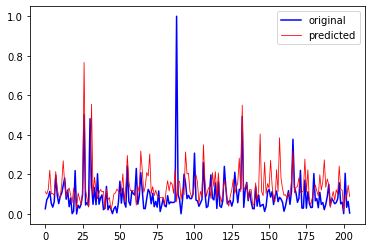

In [19]:
x_ax = range(len(ypred))
#plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, Y_data_test, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [20]:
history = model.fit(X_data_train, Y_data_train, epochs=100, batch_size=10)

# evaluate accuracy
train_acc = model.evaluate(X_data_train, Y_data_train, batch_size=32)
test_acc = model.evaluate(X_data_test, Y_data_test, batch_size=32)
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)


Epoch 1/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 8/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 9/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 10/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 11/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 12/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 13/100
82/82 [=================

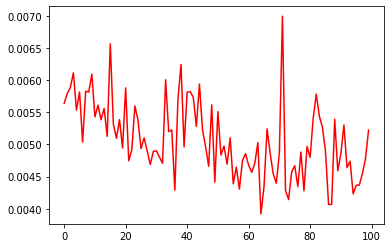

In [21]:
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()